In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#This will export your file 
sm=pd.read_csv("austo_automobile.csv")


In [4]:
sm

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [5]:
# This describe() will give the basic details of data
df=pd.DataFrame(sm.describe().T.drop(columns="count"))

df

,mean,std,min,25%,50%,75%,max
Age,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [6]:
# This will give all the required details of data
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [7]:
# This will help you to find total Number of nan Values
sm.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [8]:
# This helps us to remove Descripancies from a particular column
sm.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [9]:
#correcting Spelling mistakes and replacing them with correct one 
sm["Gender"]=sm.Gender.replace(["Femal","Femle"],["Female","Female"])

In [10]:
sm.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
sm.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [12]:
sm.Personal_loan.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Grouping allows you to separate Identical data into groups to allow for further analysis
sm.groupby("Gender")["Gender"].count()

Gender
Female     329
Male      1199
Name: Gender, dtype: int64

In [14]:
sm.Gender=sm.Gender.fillna("Male")

In [15]:
sm.isnull().sum()


Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [16]:
sm.groupby("Gender")["Gender"].count()

Gender
Female     329
Male      1252
Name: Gender, dtype: int64

In [17]:
sm.Profession.unique()

array(['Business', 'Salaried'], dtype=object)

In [18]:
sm.Education.unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [19]:
sm.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [20]:
sal=sm[sm["Partner_salary"].notnull()] [["Salary","Partner_salary","Total_salary"]]

sal

,Salary,Partner_salary,Total_salary
0,99300,70700.0,170000
1,95500,70300.0,165800
2,97300,60700.0,158000
3,72500,70300.0,142800
4,79700,60200.0,139900
...,...,...,...
1574,34700,0.0,34700
1575,34000,0.0,34000
1576,33300,0.0,33300
1578,32900,0.0,32900


In [21]:
sm.Partner_salary=sm.apply(lambda row:(row["Total_salary"]-row["Salary"]) if np.isnan(row["Partner_salary"]) else row["Partner_salary"],axis=1)

In [22]:
sm.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [23]:
sm.groupby("Make")["Make"].count()

Make
Hatchback    582
SUV          297
Sedan        702
Name: Make, dtype: int64

In [24]:
sm.Make.value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

### Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

In [25]:
# 1- Gender Category
sm["Gender"]


0         Male
1       Female
2       Female
3       Female
4         Male
         ...  
1576      Male
1577      Male
1578      Male
1579      Male
1580      Male
Name: Gender, Length: 1581, dtype: object

In [26]:
g=sm.groupby("Gender")["Gender"].count()

g

Gender
Female     329
Male      1252
Name: Gender, dtype: int64

<Axes: xlabel='Gender'>

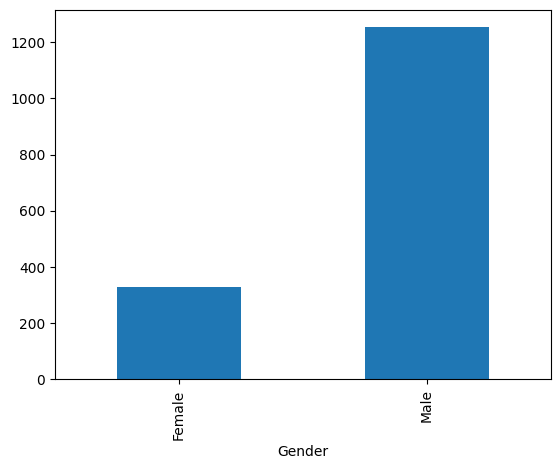

In [27]:
g.plot.bar()

In [28]:
#2-Profession

In [29]:
p=sm.groupby("Profession")["Profession"].count()
p

Profession
Business    685
Salaried    896
Name: Profession, dtype: int64

<Axes: xlabel='Profession'>

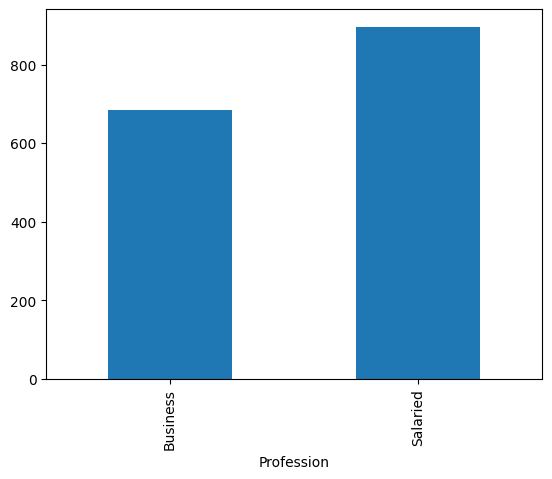

In [30]:
p.plot.bar()

In [31]:
# 3- Marital Status

In [32]:
m=sm.groupby("Marital_status")["Marital_status"].count()

m

Marital_status
Married    1443
Single      138
Name: Marital_status, dtype: int64

<Axes: xlabel='Marital_status'>

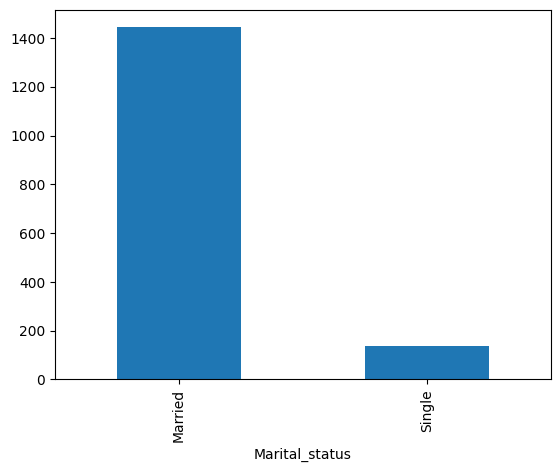

In [33]:
m.plot.bar()

In [34]:
gr=sm.groupby("Education")["Education"].count()

gr

Education
Graduate         596
Post Graduate    985
Name: Education, dtype: int64

<Axes: xlabel='Education'>

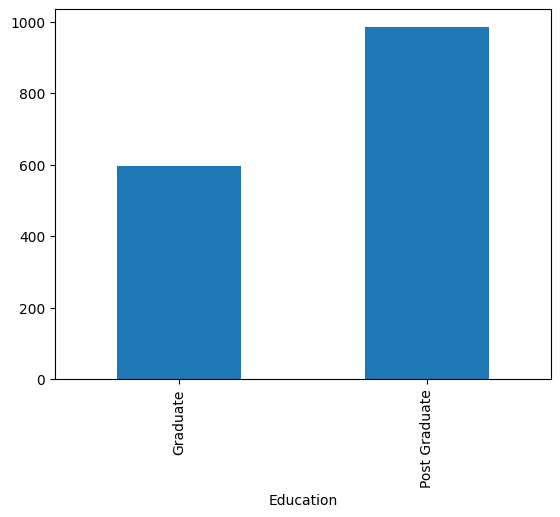

In [35]:
gr.plot.bar()

In [36]:
4 # Number of Dependents

4

In [37]:
nd=sm.groupby("No_of_Dependents")["No_of_Dependents"].count()
nd

No_of_Dependents
0     20
1    229
2    557
3    557
4    218
Name: No_of_Dependents, dtype: int64

<Axes: xlabel='No_of_Dependents'>

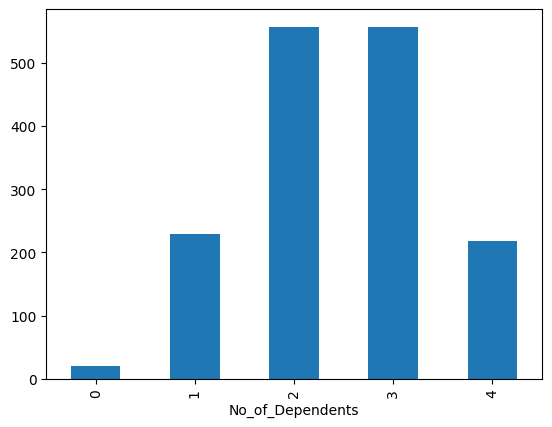

In [38]:
nd.plot.bar()

In [39]:
#5-Personal_Loan

pl=sm.groupby("Personal_loan")["Personal_loan"].count()

pl

Personal_loan
No     789
Yes    792
Name: Personal_loan, dtype: int64

<Axes: xlabel='Personal_loan'>

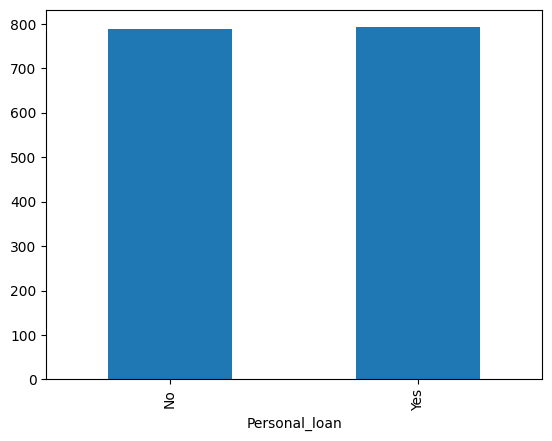

In [40]:
pl.plot.bar()

In [41]:
#6-House Loan

hl=sm.groupby("House_loan")["House_loan"].count()

hl

House_loan
No     1054
Yes     527
Name: House_loan, dtype: int64

<Axes: xlabel='House_loan'>

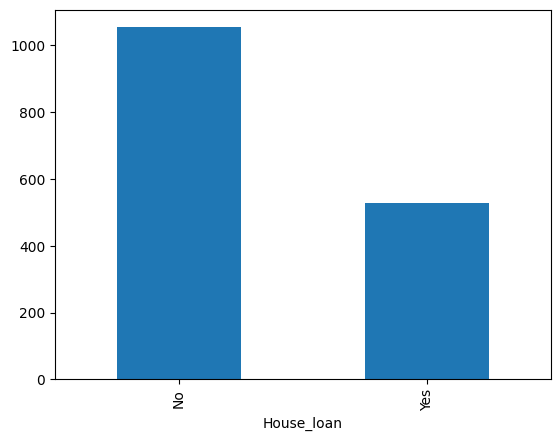

In [42]:
hl.plot.bar()

In [43]:
sl=sm.groupby("Total_salary")["Total_salary"].count()

sl

Total_salary
30000     1
30600     1
30900     1
31100     2
31200     1
         ..
169000    1
169300    1
170000    1
170400    1
171000    1
Name: Total_salary, Length: 754, dtype: int64

<Axes: xlabel='Total_salary'>

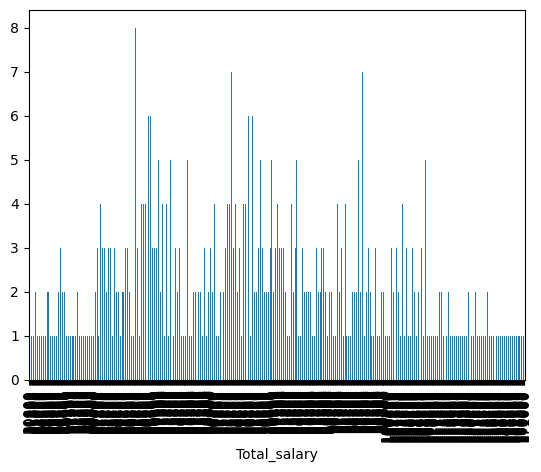

In [44]:
sl.plot.bar()

In [45]:
# 7- in comparion of "Make"
m=sm.groupby("Make")["Make"].count()
m

Make
Hatchback    582
SUV          297
Sedan        702
Name: Make, dtype: int64

<Axes: xlabel='Make'>

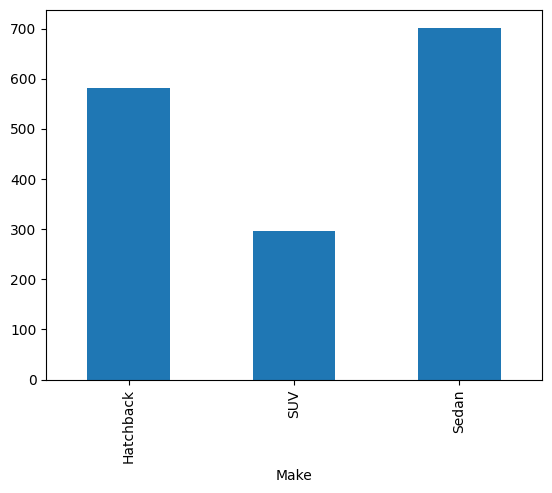

In [46]:
m.plot.bar()

#### D Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

In [47]:
sm.pivot_table("Make",index="Gender",columns="Profession",aggfunc={"Gender":"count"})

Profession,Business,Salaried
Gender,,
Female,105,224
Male,580,672


In [48]:
 pvt=sm.groupby(["Gender","Profession"])["Make"].count().unstack()

pvt

Profession,Business,Salaried
Gender,,
Female,105,224
Male,580,672


<Axes: xlabel='Gender'>

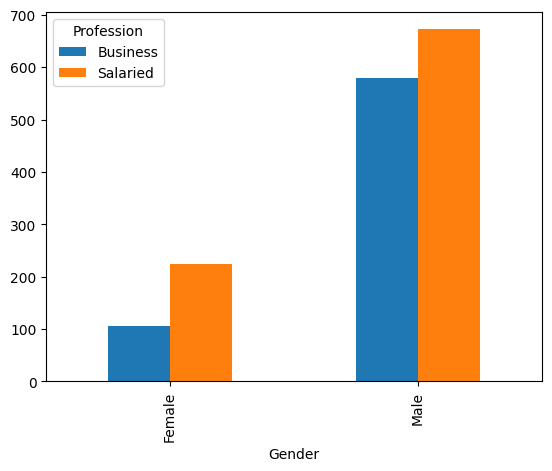

In [49]:
pvt.plot.bar()

### E- Employees working on the existing marketing campaign have made the following remarks.Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

In [50]:
# E1-Men prefer SUV by a large margin, compared to the women”
sm.groupby(["Gender","Make"])["Make"].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [51]:
MaleD=sm[["Gender","Make"]].where(sm["Gender"]=="Male").dropna()
MaleD

,Gender,Make
0,Male,SUV
4,Male,SUV
7,Male,SUV
8,Male,SUV
9,Male,SUV
...,...,...
1576,Male,Hatchback
1577,Male,Hatchback
1578,Male,Hatchback
1579,Male,Hatchback


In [52]:
FemaleD=sm[["Gender","Make"]].where(sm["Gender"]=="Female")
FemaleD.count()

Gender    329
Make      329
dtype: int64

In [53]:
#Number of females are very less with respect to the male

sam1=MaleD.sample(329).groupby("Make").count()

In [54]:
sam2=MaleD.sample(329).groupby("Make").count()

In [55]:
sam3=MaleD.sample(329).groupby("Make").count()

In [56]:
sam1

,Gender
Make,
Hatchback,160
SUV,37
Sedan,132


In [57]:
sam2

,Gender
Make,
Hatchback,145
SUV,30
Sedan,154


In [58]:
sam3

,Gender
Make,
Hatchback,159
SUV,26
Sedan,144


In [59]:
sam1.rename(columns={"Gender":"Male"})

,Male
Make,
Hatchback,160
SUV,37
Sedan,132


In [60]:
# Females are preferring SUV over Males:

SuvMale=[sam1.iloc[1][0],sam2.iloc[1][0],sam3.iloc[1][0]]

C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\3322669044.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SuvMale=[sam1.iloc[1][0],sam2.iloc[1][0],sam3.iloc[1][0]]


In [61]:
Fmd=(FemaleD.groupby("Make").count()).rename(columns={"Gender":"Female"})

Fmd

,Female
Make,
Hatchback,15
SUV,173
Sedan,141


In [62]:
SuvFemale=[Fmd.iloc[1][0],Fmd.iloc[1][0],Fmd.iloc[1][0]]

C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\908379782.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SuvFemale=[Fmd.iloc[1][0],Fmd.iloc[1][0],Fmd.iloc[1][0]]


In [63]:
df1=pd.DataFrame({"Male":SuvMale,"Female":SuvFemale},index=["Sample1","Sample2","Sample3"])

<Axes: >

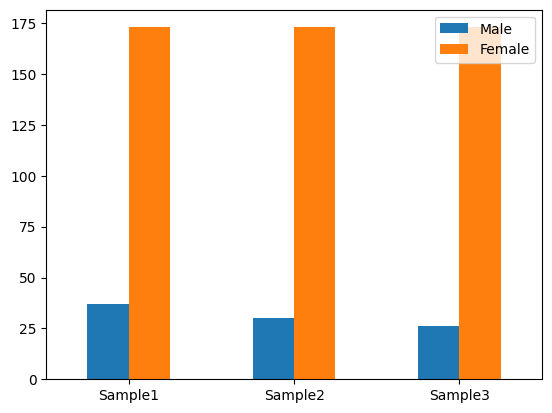

In [64]:
df1.plot.bar(rot=0)

In [65]:
# Males are preferring Hatchback over Females:

HBMale=[sam1.iloc[0][0],sam2.iloc[0][0],sam2.iloc[0][0]]
HBFemale=[Fmd.iloc[0][0],Fmd.iloc[0][0],Fmd.iloc[0][0]]


C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\3114674376.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  HBMale=[sam1.iloc[0][0],sam2.iloc[0][0],sam2.iloc[0][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\3114674376.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  HBFemale=[Fmd.iloc[0][0],Fmd.iloc[0][0],Fmd.iloc[0][0]]


In [66]:
df2=pd.DataFrame({"Male":HBMale,"Female":HBFemale},index=["Sample1","Sample2","Sample2"])

<Axes: >

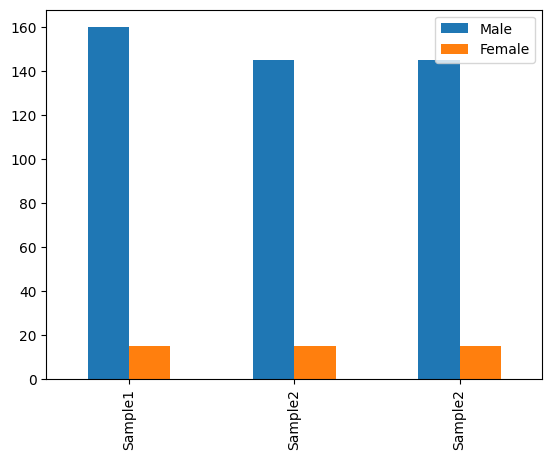

In [67]:
df2.plot.bar()

In [68]:
SeMale=[sam1.iloc[2][0],sam2.iloc[2][0],sam2.iloc[2][0]]
SeFemale=[Fmd.iloc[2][0],Fmd.iloc[2][0],Fmd.iloc[2][0]]

C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\1423783909.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SeMale=[sam1.iloc[2][0],sam2.iloc[2][0],sam2.iloc[2][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\1423783909.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SeFemale=[Fmd.iloc[2][0],Fmd.iloc[2][0],Fmd.iloc[2][0]]


In [69]:
df3=pd.DataFrame({"Male":SeMale,"Female":SeFemale},index=["Sample1","Sample2","Sample2"])

<Axes: >

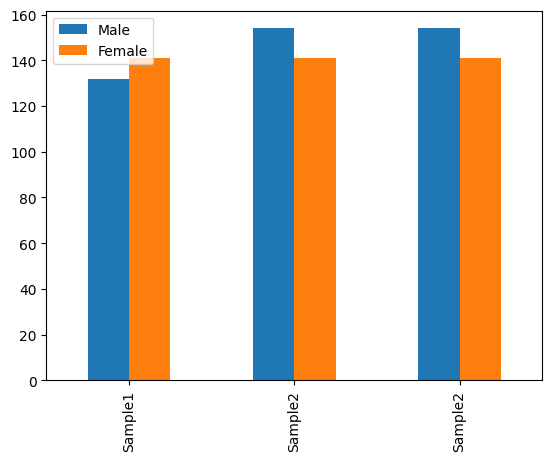

In [70]:
df3.plot.bar()

In [71]:
# E2- Ned Stark believes that a salaried person is more likely to buy a Sedan.

a=sm[["Profession","Make"]]

a

,Profession,Make
0,Business,SUV
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
...,...,...
1576,Salaried,Hatchback
1577,Business,Hatchback
1578,Business,Hatchback
1579,Business,Hatchback


In [72]:

sm.groupby(["Profession","Make"])["Make"].count()


Profession  Make     
Business    Hatchback    290
            SUV           89
            Sedan        306
Salaried    Hatchback    292
            SUV          208
            Sedan        396
Name: Make, dtype: int64

In [119]:
bsd=a.where(a["Profession"]=="Business")
bsd

,Profession,Make
0,Business,SUV
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1576,NaN,NaN
1577,Business,Hatchback
1578,Business,Hatchback
1579,Business,Hatchback


In [121]:
bsd=bsd.groupby("Make").count().rename(columns={"Profession":"Bussiness"})

bsd

,Profession
Make,
Hatchback,290
SUV,89
Sedan,306


In [75]:
sal=a.where(a["Profession"]=="Salaried").dropna()
sal

,Profession,Make
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
5,Salaried,SUV
...,...,...
1569,Salaried,Hatchback
1574,Salaried,Sedan
1575,Salaried,Hatchback
1576,Salaried,Hatchback


In [76]:
sal=sal.groupby("Make").count().rename(columns={"Profession":"Salaried"})

sal

,Salaried
Make,
Hatchback,292
SUV,208
Sedan,396


In [77]:
bsd

,Bussiness
Make,
Hatchback,290
SUV,89
Sedan,306


In [78]:
suv=[sal.iloc[1][0],bsd.iloc[1][0]]
sed=[sal.iloc[2][0],bsd.iloc[2][0]]

C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\1016350044.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  suv=[sal.iloc[1][0],bsd.iloc[1][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\1016350044.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sed=[sal.iloc[2][0],bsd.iloc[2][0]]


In [79]:
df4=pd.DataFrame({"Suv":suv,"Sedan":sed},index=["Salaried","Business"])

<Axes: >

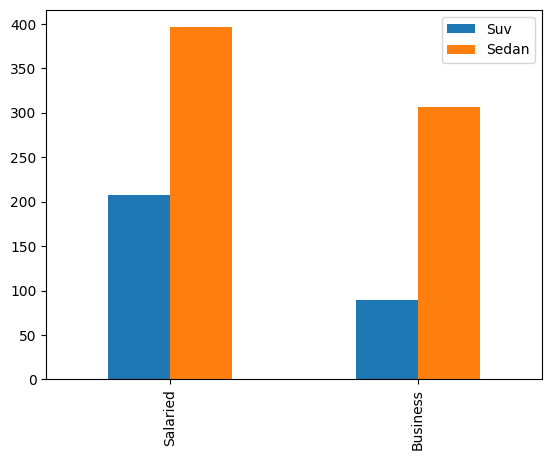

In [80]:
df4.plot.bar()

In [81]:
# E3- Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

df=sm[["Gender","Profession","Make"]].dropna()
df

,Gender,Profession,Make
0,Male,Business,SUV
1,Female,Salaried,SUV
2,Female,Salaried,SUV
3,Female,Salaried,SUV
4,Male,Salaried,SUV
...,...,...,...
1576,Male,Salaried,Hatchback
1577,Male,Business,Hatchback
1578,Male,Business,Hatchback
1579,Male,Business,Hatchback


In [82]:
dff=df.groupby(["Gender","Profession","Make"])["Make"].count()

dff

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Male    Business    Hatchback    290
                    SUV           34
                    Sedan        256
        Salaried    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

In [83]:
F=df.where(df["Gender"]=="Female").dropna()

F

,Gender,Profession,Make
1,Female,Salaried,SUV
2,Female,Salaried,SUV
3,Female,Salaried,SUV
5,Female,Salaried,SUV
6,Female,Salaried,SUV
...,...,...,...
1350,Female,Salaried,Hatchback
1389,Female,Salaried,Hatchback
1503,Female,Salaried,Hatchback
1518,Female,Salaried,Hatchback


In [84]:
F=F.groupby(["Gender","Profession","Make"])["Make"].count()

F


Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Name: Make, dtype: int64

In [85]:
M=df.where(df["Gender"]=="Male").dropna()

M

,Gender,Profession,Make
0,Male,Business,SUV
4,Male,Salaried,SUV
7,Male,Salaried,SUV
8,Male,Salaried,SUV
9,Male,Salaried,SUV
...,...,...,...
1576,Male,Salaried,Hatchback
1577,Male,Business,Hatchback
1578,Male,Business,Hatchback
1579,Male,Business,Hatchback


In [86]:
M=M.groupby(["Gender","Profession","Make"])["Make"].count()

M

Gender  Profession  Make     
Male    Business    Hatchback    290
                    SUV           34
                    Sedan        256
        Salaried    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

In [87]:
F

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Name: Make, dtype: int64

In [88]:
M

Gender  Profession  Make     
Male    Business    Hatchback    290
                    SUV           34
                    Sedan        256
        Salaried    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

## From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions. Give justification along with presenting metrics/charts used for arriving at the conclusions.

In [89]:
## F1-Gender 
sm1=sm[["Gender","Make","Price"]].dropna()
sm1

,Gender,Make,Price
0,Male,SUV,61000
1,Female,SUV,61000
2,Female,SUV,57000
3,Female,SUV,61000
4,Male,SUV,57000
...,...,...,...
1576,Male,Hatchback,27000
1577,Male,Hatchback,31000
1578,Male,Hatchback,30000
1579,Male,Hatchback,24000


In [90]:
sm1.groupby(["Gender","Make"])["Price"].sum()


Gender  Make     
Female  Hatchback      412000
        SUV           9252000
        Sedan         6031000
Male    Hatchback    14996000
        SUV           7328000
        Sedan        18261000
Name: Price, dtype: int64

In [91]:
## F1- Gender (another way)

In [92]:
G=sm[["Gender","Make"]].dropna()

G

,Gender,Make
0,Male,SUV
1,Female,SUV
2,Female,SUV
3,Female,SUV
4,Male,SUV
...,...,...
1576,Male,Hatchback
1577,Male,Hatchback
1578,Male,Hatchback
1579,Male,Hatchback


In [93]:
sm.groupby(["Gender","Make"])["Make"].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [94]:
GM=G.where(G["Gender"]=="Male").dropna()

GM

,Gender,Make
0,Male,SUV
4,Male,SUV
7,Male,SUV
8,Male,SUV
9,Male,SUV
...,...,...
1576,Male,Hatchback
1577,Male,Hatchback
1578,Male,Hatchback
1579,Male,Hatchback


In [95]:
GM=GM.groupby("Make").count().rename(columns={"Gender":"Male"})

GM

,Male
Make,
Hatchback,567
SUV,124
Sedan,561


In [96]:
GF=G.where(G["Gender"]=="Female").dropna()

GF

,Gender,Make
1,Female,SUV
2,Female,SUV
3,Female,SUV
5,Female,SUV
6,Female,SUV
...,...,...
1350,Female,Hatchback
1389,Female,Hatchback
1503,Female,Hatchback
1518,Female,Hatchback


In [97]:
GF=GF.groupby("Make").count().rename(columns={"Gender":"Female"})

GF

,Female
Make,
Hatchback,15
SUV,173
Sedan,141


In [98]:
Hat=[GM.iloc[0][0],GF.iloc[0][0]]
Suv=[GM.iloc[1][0],GF.iloc[1][0]]
Sed=[GM.iloc[2][0],GF.iloc[2][0]]

C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\2929009610.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Hat=[GM.iloc[0][0],GF.iloc[0][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\2929009610.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Suv=[GM.iloc[1][0],GF.iloc[1][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\2929009610.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Sed=[GM.iloc[2][0],GF.iloc[2][0]

In [99]:
dfg=pd.DataFrame({"Hacthback":Hat,"SUV":Suv,"Sedan":Sed},index=["Male","Female"]).T

<Axes: >

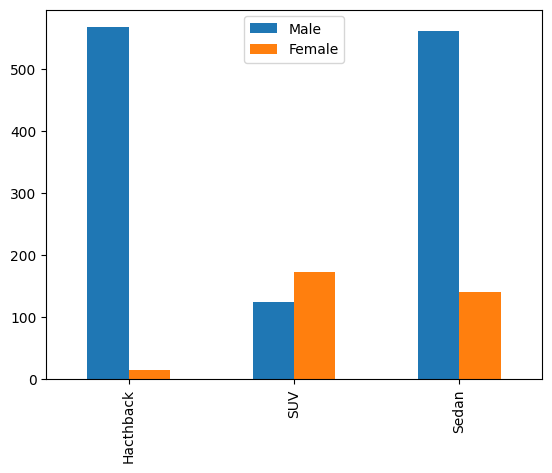

In [100]:
dfg.plot.bar()

 ## F2- Personal Loan 

In [101]:
sm2=sm[["Personal_loan","Make","Price"]].dropna()
sm2

,Personal_loan,Make,Price
0,No,SUV,61000
1,Yes,SUV,61000
2,No,SUV,57000
3,Yes,SUV,61000
4,No,SUV,57000
...,...,...,...
1576,No,Hatchback,27000
1577,No,Hatchback,31000
1578,No,Hatchback,30000
1579,Yes,Hatchback,24000


In [102]:
sm2.groupby(["Personal_loan","Make"])["Price"].sum()

Personal_loan  Make     
No             Hatchback     7765000
               SUV          10373000
               Sedan        10852000
Yes            Hatchback     7643000
               SUV           6207000
               Sedan        13440000
Name: Price, dtype: int64

In [103]:
## F2- Profession (extra)

In [104]:
P=sm[["Profession","Make"]].dropna()

P

,Profession,Make
0,Business,SUV
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
...,...,...
1576,Salaried,Hatchback
1577,Business,Hatchback
1578,Business,Hatchback
1579,Business,Hatchback


In [105]:
Pb=P.where(P["Profession"]=="Business").dropna()
Pb

,Profession,Make
0,Business,SUV
14,Business,SUV
16,Business,SUV
18,Business,SUV
22,Business,SUV
...,...,...
1572,Business,Hatchback
1573,Business,Hatchback
1577,Business,Hatchback
1578,Business,Hatchback


In [106]:
bsn=Pb.groupby("Make").count().rename(columns={"Profession": "Business"})
bsn

,Business
Make,
Hatchback,290
SUV,89
Sedan,306


In [107]:
Ps=P.where(P["Profession"]=="Salaried").dropna()
Ps


,Profession,Make
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
5,Salaried,SUV
...,...,...
1569,Salaried,Hatchback
1574,Salaried,Sedan
1575,Salaried,Hatchback
1576,Salaried,Hatchback


In [108]:
sld=Ps.groupby("Make").count().rename(columns={"Profession":"Salaried"})
sld

,Salaried
Make,
Hatchback,292
SUV,208
Sedan,396


In [109]:
Hat=[bsn.iloc[0][0],sld.iloc[0][0]]
Suv=[bsn.iloc[1][0],sld.iloc[1][0]]
Sed=[bsn.iloc[2][0],sld.iloc[2][0]]

C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\484090603.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Hat=[bsn.iloc[0][0],sld.iloc[0][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\484090603.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Suv=[bsn.iloc[1][0],sld.iloc[1][0]]
C:\Users\masoo\AppData\Local\Temp\ipykernel_3896\484090603.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Sed=[bsn.iloc[2][0],sld.iloc[2]

In [110]:
pdd=pd.DataFrame({"Hatchback":Hat,"SUV":Suv,"Sedan":Sed},index=["Business","Salaried"]).T

<Axes: >

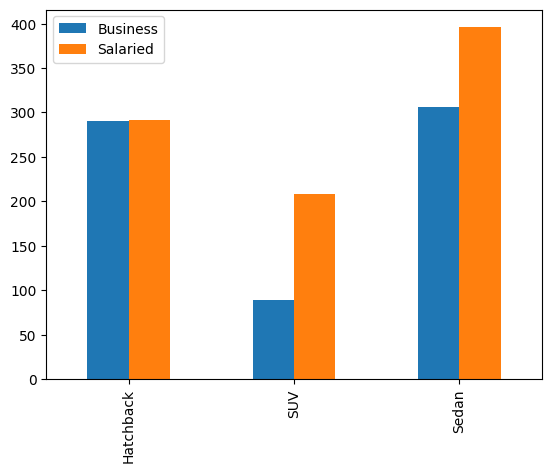

In [111]:
pdd.plot.bar()

## G- From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [112]:
pwd=sm[["Partner_working","Price","Make"]].dropna()
pwd

,Partner_working,Price,Make
0,Yes,61000,SUV
1,Yes,61000,SUV
2,Yes,57000,SUV
3,Yes,61000,SUV
4,Yes,57000,SUV
...,...,...,...
1576,No,27000,Hatchback
1577,No,31000,Hatchback
1578,No,30000,Hatchback
1579,No,24000,Hatchback


In [113]:
pwd.groupby(["Partner_working","Make","Price"]).count()

Empty DataFrame
Columns: []
Index: [(No, Hatchback, 18000), (No, Hatchback, 19000), (No, Hatchback, 20000), (No, Hatchback, 21000), (No, Hatchback, 22000), (No, Hatchback, 23000), (No, Hatchback, 24000), (No, Hatchback, 25000), (No, Hatchback, 26000), (No, Hatchback, 27000), (No, Hatchback, 28000), (No, Hatchback, 29000), (No, Hatchback, 30000), (No, Hatchback, 31000), (No, Hatchback, 32000), (No, Hatchback, 33000), (No, SUV, 31000), (No, SUV, 32000), (No, SUV, 36000), (No, SUV, 39000), (No, SUV, 40000), (No, SUV, 45000), (No, SUV, 48000), (No, SUV, 49000), (No, SUV, 50000), (No, SUV, 51000), (No, SUV, 52000), (No, SUV, 53000), (No, SUV, 54000), (No, SUV, 55000), (No, SUV, 56000), (No, SUV, 57000), (No, SUV, 58000), (No, SUV, 59000), (No, SUV, 60000), (No, SUV, 61000), (No, SUV, 62000), (No, SUV, 63000), (No, SUV, 64000), (No, SUV, 65000), (No, SUV, 66000), (No, SUV, 67000), (No, SUV, 68000), (No, SUV, 69000), (No, SUV, 70000), (No, Sedan, 18000), (No, Sedan, 19000), (No, Sedan, 20000), (No, Sedan, 21000), (No, Sedan, 22000), (No, Sedan, 23000), (No, Sedan, 24000), (No, Sedan, 26000), (No, Sedan, 27000), (No, Sedan, 28000), (No, Sedan, 29000), (No, Sedan, 30000), (No, Sedan, 31000), (No, Sedan, 32000), (No, Sedan, 33000), (No, Sedan, 34000), (No, Sedan, 35000), (No, Sedan, 36000), (No, Sedan, 37000), (No, Sedan, 38000), (No, Sedan, 39000), (No, Sedan, 40000), (No, Sedan, 41000), (No, Sedan, 42000), (No, Sedan, 43000), (No, Sedan, 44000), (No, Sedan, 45000), (No, Sedan, 46000), (No, Sedan, 47000), (No, Sedan, 48000), (No, Sedan, 49000), (No, Sedan, 50000), (No, Sedan, 51000), (No, Sedan, 52000), (No, Sedan, 53000), (No, Sedan, 54000), (No, Sedan, 55000), (Yes, Hatchback, 19000), (Yes, Hatchback, 20000), (Yes, Hatchback, 22000), (Yes, Hatchback, 23000), (Yes, Hatchback, 24000), (Yes, Hatchback, 25000), (Yes, Hatchback, 26000), (Yes, Hatchback, 27000), (Yes, Hatchback, 28000), (Yes, Hatchback, 29000), (Yes, Hatchback, 30000), (Yes, Hatchback, 31000), (Yes, Hatchback, 32000), (Yes, Hatchback, 33000), (Yes, SUV, 31000), (Yes, SUV, 32000), (Yes, SUV, 36000), (Yes, SUV, 37000), ...]

[163 rows x 0 columns]

### H-  The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [114]:
Ms=sm[["Marital_status","Gender","Make"]]
Ms

,Marital_status,Gender,Make
0,Married,Male,SUV
1,Married,Female,SUV
2,Married,Female,SUV
3,Married,Female,SUV
4,Married,Male,SUV
...,...,...,...
1576,Single,Male,Hatchback
1577,Married,Male,Hatchback
1578,Single,Male,Hatchback
1579,Married,Male,Hatchback


In [115]:
Ms.groupby(["Marital_status","Gender","Make"])["Make"].count()

Marital_status  Gender  Make     
Married         Female  Hatchback     14
                        SUV          166
                        Sedan        127
                Male    Hatchback    484
                        SUV          115
                        Sedan        537
Single          Female  Hatchback      1
                        SUV            7
                        Sedan         14
                Male    Hatchback     83
                        SUV            9
                        Sedan         24
Name: Make, dtype: int64

In [116]:
Ms.groupby(["Marital_status","Gender","Make"])["Make"].count()

Marital_status  Gender  Make     
Married         Female  Hatchback     14
                        SUV          166
                        Sedan        127
                Male    Hatchback    484
                        SUV          115
                        Sedan        537
Single          Female  Hatchback      1
                        SUV            7
                        Sedan         14
                Male    Hatchback     83
                        SUV            9
                        Sedan         24
Name: Make, dtype: int64

In [117]:
ms=sm[["Profession","Marital_status","Gender","Make"]]
ms

,Profession,Marital_status,Gender,Make
0,Business,Married,Male,SUV
1,Salaried,Married,Female,SUV
2,Salaried,Married,Female,SUV
3,Salaried,Married,Female,SUV
4,Salaried,Married,Male,SUV
...,...,...,...,...
1576,Salaried,Single,Male,Hatchback
1577,Business,Married,Male,Hatchback
1578,Business,Single,Male,Hatchback
1579,Business,Married,Male,Hatchback


In [118]:
ms.groupby(["Profession","Marital_status","Gender","Make"])["Make"].count()

Profession  Marital_status  Gender  Make     
Business    Married         Female  SUV           53
                                    Sedan         43
                            Male    Hatchback    239
                                    SUV           33
                                    Sedan        246
            Single          Female  SUV            2
                                    Sedan          7
                            Male    Hatchback     51
                                    SUV            1
                                    Sedan         10
Salaried    Married         Female  Hatchback     14
                                    SUV          113
                                    Sedan         84
                            Male    Hatchback    245
                                    SUV           82
                                    Sedan        291
            Single          Female  Hatchback      1
                                    SUV            5
